<img src="https://www.mines.edu/webcentral/wp-content/uploads/sites/267/2019/02/horizontallightbackground.jpg" width="100%"> 
### CSCI250 Python Computing: Building a Sensor System
<hr style="height:5px" width="100%" align="left">

# `numpy`: file I/O

# Objective
* introduce `numpy` file I/O operations

# Resources
* [numpy.org](http://www.numpy.org)
* [`numpy` I/O](https://docs.scipy.org/doc/numpy/reference/routines.io.html)

In [1]:
import numpy as np
import numpy.random as rng

nRow = 3
nCol = 2

In [2]:
x = rng.rand(nRow,nCol)
print(x)

[[0.28151662 0.54720386]
 [0.86098251 0.2218721 ]
 [0.33375248 0.64937535]]


In [3]:
y = x.transpose()
print(y)

[[0.28151662 0.86098251 0.33375248]
 [0.54720386 0.2218721  0.64937535]]


# `np.save()`
Save a single array to a binary file in `.npy` format.

In [5]:
np.save('foo.npy', x)

In [6]:
# access the files by magic
%ls -l foo.npy

 Volume in drive C is Windows
 Volume Serial Number is 0042-8355

 Directory of C:\Users\sammb\work\classes\csci250\lectures


 Directory of C:\Users\sammb\work\classes\csci250\lectures

10/07/2023  05:19 PM               176 foo.npy
               1 File(s)            176 bytes
               0 Dir(s)  134,765,305,856 bytes free


In [7]:
# display file content by magic
%cat foo.npy

UsageError: Line magic function `%cat` not found.


In [14]:
# binary save is fast
a = rng.rand(1000,1000)
%time np.save('a.npy', a)

Wall time: 3.82 ms


# `np.savetxt()`
Save an array to a text file.

In [ ]:
np.savetxt('foo.csv', x, fmt='%4.1f', delimiter=',')

In [15]:
# access the files by magic
%ls -l *.csv

 Volume in drive C is Windows
 Volume Serial Number is 0042-8355

 Directory of C:\Users\sammb\work\classes\csci250\lectures


 Directory of C:\Users\sammb\work\classes\csci250\lectures



File Not Found


In [16]:
# display file content by magic
%cat foo.csv

UsageError: Line magic function `%cat` not found.


In [18]:
# text save is slow
a = rng.rand(1000,1000)
%time np.savetxt('a.csv', a, fmt='%f', delimiter=',')

Wall time: 223 ms


# `np.savez()`

Save multiple arrays to a binary file in uncompressed `.npz` format.

In [19]:
np.savez('foo.npz', x,y)

In [20]:
# access the files by magic
%ls -l *.npz

 Volume in drive C is Windows
 Volume Serial Number is 0042-8355

 Directory of C:\Users\sammb\work\classes\csci250\lectures


 Directory of C:\Users\sammb\work\classes\csci250\lectures

10/07/2023  05:23 PM               602 foo.npz
               1 File(s)            602 bytes
               0 Dir(s)  134,741,069,824 bytes free


In [21]:
# display file content by magic
%cat foo.npz

UsageError: Line magic function `%cat` not found.


# `np.load()`
Load arrays from files stored in `numpy` .npy format.

In [22]:
print('x=',x)

x= [[0.28151662 0.54720386]
 [0.86098251 0.2218721 ]
 [0.33375248 0.64937535]]


In [23]:
t = np.load('foo.npy')
print('t=',t)

t= [[0.28151662 0.54720386]
 [0.86098251 0.2218721 ]
 [0.33375248 0.64937535]]


In [24]:
# load multiple arrays at once
t = np.load('foo.npz')

# list the arrays available in t
print(t.files)

['arr_0', 'arr_1']


In [25]:
# extract the arrays from t
t1 = t['arr_0']
t2 = t['arr_1']

print(t1,'\n')
print(t2,'\n')

[[0.28151662 0.54720386]
 [0.86098251 0.2218721 ]
 [0.33375248 0.64937535]] 

[[0.28151662 0.86098251 0.33375248]
 [0.54720386 0.2218721  0.64937535]] 



# `np.loadtxt()`
Load data from a text file.

In [26]:
z = np.loadtxt('foo.csv', delimiter=',')

print('z=',z)

FileNotFoundError: foo.csv not found.

# `tempfile` module

Generates temporary files or directories for short-term data storage.

In [27]:
import tempfile

In [28]:
# open a temp file and do not delete it after use
fp = tempfile.NamedTemporaryFile( delete=False ) 

# get the temp file name
# must append .npy extension!
fname = fp.name + '.npy' 
print(fname)

C:\Users\sammb\AppData\Local\Temp\tmpu6epvp6i.npy


In [29]:
print(x)

# write to temp file
np.save(fname, x)

[[0.28151662 0.54720386]
 [0.86098251 0.2218721 ]
 [0.33375248 0.64937535]]


In [30]:
# read from temp file
t = np.load(fname)

print(t)

[[0.28151662 0.54720386]
 [0.86098251 0.2218721 ]
 [0.33375248 0.64937535]]


In [31]:
import os

# remove temp file
os.remove(fname)

<img src="https://www.dropbox.com/s/7vd3ezqkyhdxmap/demo.png?raw=1" width="10%" align="left">

# Demo
A 2D uncorrelated Gaussian function with center at ($c_x$,$c_y$) and standard deviations $\sigma_x,\sigma_y$ is defined as:

$$
f(x,y) = \dfrac{1}{2\pi\sigma_x\sigma_y} 
e^{ -\dfrac{1}{2} 
\left[
\left( \dfrac{x-c_x}{\sigma_x} \right)^2 +
\left( \dfrac{y-c_y}{\sigma_y} \right)^2
\right]
}
$$

* Generate and plot the Gaussian function. 
* Save the Gaussian decimated by a factor of $10$ in both $x$ and $y$. 
* Read the decimated Gaussian and plot it. 
* Verify that file sizes are consistent with the decimation factor.

Define coordinates $x$ and $y$.

In [32]:
xMin, xMax, dx = -2.0, +2.0, 0.02
yMin, yMax, dy = -2.0, +2.0, 0.02

x = np.arange(xMin, xMax + dx, dx)
y = np.arange(yMin, yMax + dy, dy)

X, Y = np.meshgrid(x, y)

Build the Gaussian function.

In [33]:
# center
cx = +0.5
cy = -0.5

# standard deviation
sx = 1.0
sy = 1.0

In [34]:
# compute the Gaussian
A = np.power(2*np.pi*sx*sy,-1)
E = np.power( (X-cx)/sx,2 ) + np.power( (Y-cy)/sy,2 )

G = A * np.exp(-0.5*E)

In [36]:
import matplotlib.pyplot as plt

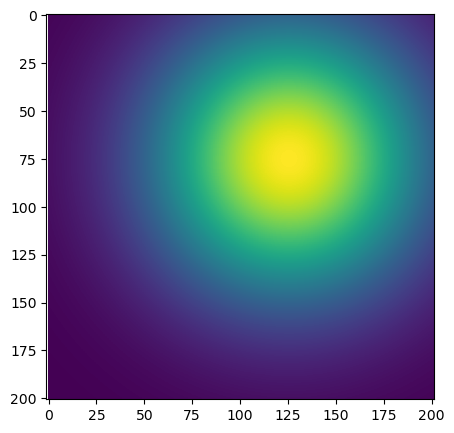

In [37]:
plt.figure(figsize=(5,5))
plt.imshow(G)
plt.axis('equal');

Save the undecimated Gaussian.

In [38]:
print(np.shape(G))

np.save('gau.npy',G)

(201, 201)


Decimate the Gaussian and save.

In [39]:
j = 10             # decimation factor

D = G[ ::j, ::j ]  # decimate by slicing

In [40]:
print(np.shape(D))

np.save('dec.npy',D)

(21, 21)


Compare the file sizes.

In [41]:
%ls -latr gau.npy
%ls -latr dec.npy

 Volume in drive C is Windows
 Volume Serial Number is 0042-8355

 Directory of C:\Users\sammb\work\classes\csci250\lectures


 Directory of C:\Users\sammb\work\classes\csci250\lectures

10/07/2023  05:28 PM           323,336 gau.npy
               1 File(s)        323,336 bytes
               0 Dir(s)  134,739,701,760 bytes free
 Volume in drive C is Windows
 Volume Serial Number is 0042-8355

 Directory of C:\Users\sammb\work\classes\csci250\lectures


 Directory of C:\Users\sammb\work\classes\csci250\lectures

10/07/2023  05:28 PM             3,656 dec.npy
               1 File(s)          3,656 bytes
               0 Dir(s)  134,739,701,760 bytes free


Read and plot the decimated Gaussian

In [42]:
H = np.load('dec.npy')

print(np.shape(H))

(21, 21)


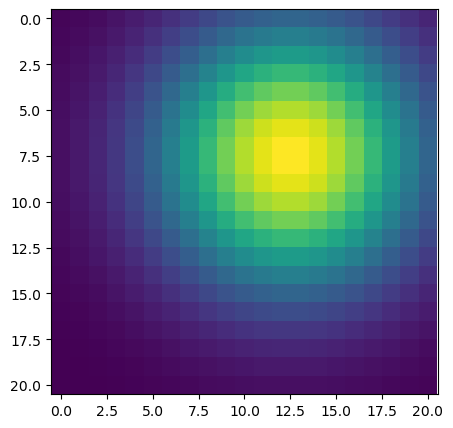

In [43]:
plt.figure(figsize=(5,5))
plt.imshow(H)
plt.axis('equal');

<img src="https://www.dropbox.com/s/wj23ce93pa9j8pe/demo.png?raw=1" width="10%" align="left">

# Exercise

<br> <br>
* Make two large time series $u_1$ and $u_2$ and fill them with random numbers from a uniform distribution. Save them to `uu.npz`. 
* Make two other  time series $n_1$ and $n_2$ and fill them with random numbers from a normal distribution. Save them to `nn.npz`.

Read `uu.npz` and `nn.npz` and save two other `.npz` files containing $u_1$ & $n_1$, and $u_2$ & $n_2$, respectively.

In [73]:
import time

#np.random.seed(seed = int(time.time()))

u1 = np.ones(100)
u2 = np.ones(100)
for i in range(len(u1)):
    u1[i] = u1[i] * np.random.uniform()
    u2[i] = u2[i] * np.random.uniform()
np.savez('uu.npz', u1, u2)

n1 = np.ones(100)
n2 = np.ones(100)
for i in range(len(n1)):
    n1[i] = n1[i] * np.random.normal()
    n2[i] = n2[i] * np.random.normal()
np.savez('nn.npz', n1, n2)

uu = np.load('uu.npz')
print(uu.files)
print(uu['arr_0'])

['arr_0', 'arr_1']
[0.21510976 0.73552477 0.2361432  0.5954563  0.87219146 0.29034164
 0.59029413 0.1354337  0.61340954 0.99704245 0.46200689 0.8497038
 0.33290671 0.84014846 0.43775448 0.97987764 0.941522   0.12501115
 0.72304184 0.8106617  0.10823557 0.22343355 0.44626972 0.25830595
 0.0391554  0.5855323  0.32674063 0.18647004 0.3972841  0.89595744
 0.26955666 0.71761897 0.41259237 0.1678005  0.47804265 0.65728434
 0.5297921  0.1040207  0.72700404 0.41853276 0.72351667 0.42979978
 0.06917254 0.81291021 0.5542501  0.77636651 0.42005486 0.01072313
 0.19551955 0.51220386 0.38177828 0.82286579 0.56682769 0.47601522
 0.24309584 0.72655545 0.6199527  0.13404947 0.78913493 0.17933959
 0.69025494 0.89910245 0.16537712 0.13394192 0.0218165  0.56724681
 0.43694046 0.71924118 0.02311821 0.1913131  0.63277459 0.67405205
 0.04847826 0.23553138 0.1814585  0.05470254 0.59809872 0.6138424
 0.35824193 0.84071064 0.67859722 0.68449224 0.009673   0.33648702
 0.15544033 0.29049718 0.84144762 0.31675252 